In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_excel('weekly_ratable_2022_2023.xlsx')

In [7]:
print(df)

    Week Start  Immediate
0   2021-08-01   0.548922
1   2021-08-08   0.547857
2   2021-08-15   0.532510
3   2021-08-22   0.556669
4   2021-08-29   0.495843
..         ...        ...
99  2023-06-25   0.669458
100 2023-07-02   0.622951
101 2023-07-09   0.616104
102 2023-07-16   0.649778
103 2023-07-23   0.668482

[104 rows x 2 columns]


In [8]:
df.head()

,Week Start,Immediate
0,2021-08-01,0.548922
1,2021-08-08,0.547857
2,2021-08-15,0.532510
3,2021-08-22,0.556669
4,2021-08-29,0.495843


In [9]:
df.set_index('Week Start',inplace=True)

In [10]:
df.head()

,Immediate
Week Start,
2021-08-01,0.548922
2021-08-08,0.547857
2021-08-15,0.532510
2021-08-22,0.556669
2021-08-29,0.495843


In [11]:
df.describe()

,Immediate
count,104.000000
mean,0.573806
std,0.049768
min,0.452833
25%,0.539139
50%,0.569216
75%,0.609424
max,0.692084


<Axes: xlabel='Week Start'>

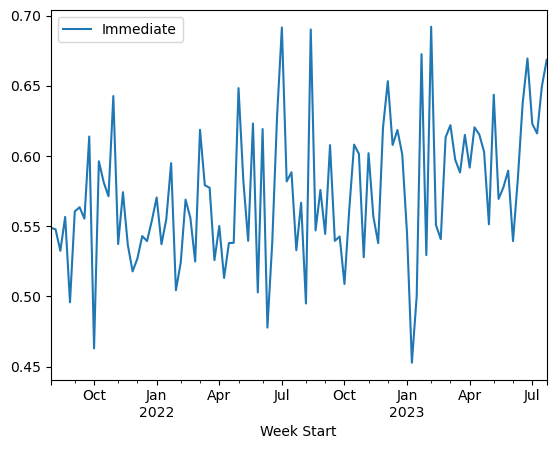

In [12]:
#Step 2. Visualize the Data
df.plot()

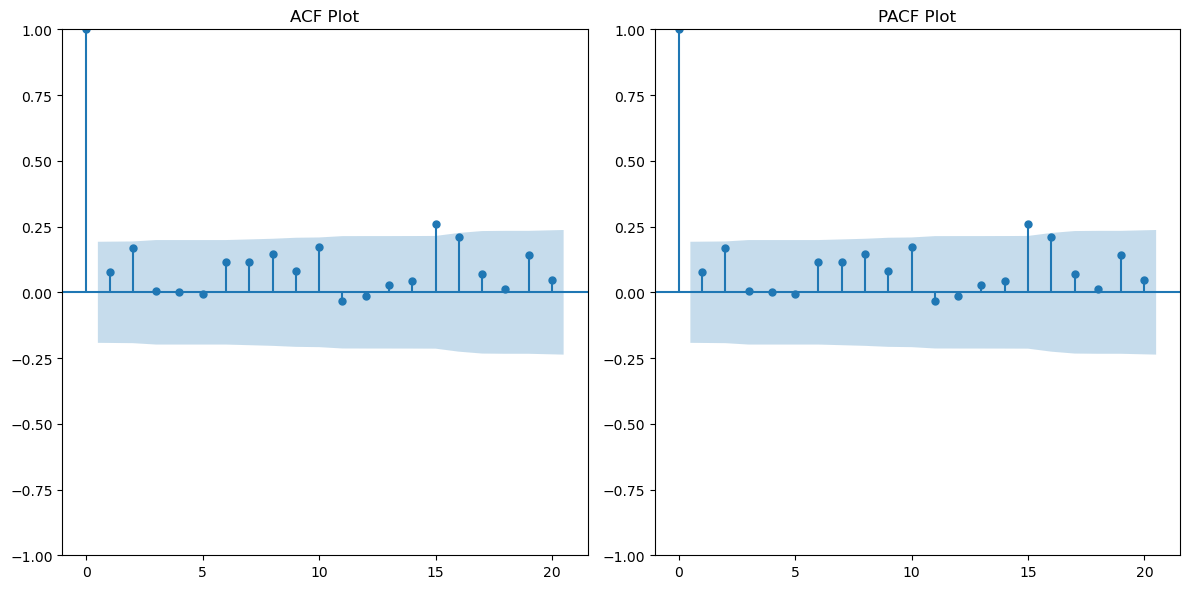

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ACF plot- Autocorrelation function to get the p value i.e. Max value after which it diminishes (has to be integer)
plt.figure(figsize =(12,6))
plt.subplot(1,2,1)# grid size
plot_acf(df,lags=20, ax=plt.gca()) #display auto correlation values for the first 20 lags 
plt.title('ACF Plot')

#PACF plot-Partial Autocorrelation to get the p value i.e. Max value after which it diminishes (has to be integer)
plt.subplot(1,2,2)# grid size
plot_acf(df,lags=20, ax=plt.gca()) #display auto correlation values for the first 20 lags 
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

In [14]:
###Testing for Stationarity

from statsmodels.tsa.stattools import adfuller

In [15]:
#Null Hypo: It is non stationary
#Alternate Hypo: It is stationary
#95% CI considered

def adfuller_test(Bookings):
    result=adfuller(Bookings)
    labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result,labels):
        print(label+':'+str(value))
    if result[1] <=.05:
        print("Strong evidence against null hypo")
    else:
        print("Weak evidence against null hypo")

In [16]:
adfuller_test(df['Immediate'])

ADF Test Statistic:-5.421715676651147
p-value:3.049047840762668e-06
#Lags Used:1
Number of Observations Used:102
Strong evidence against null hypo


In [17]:
### For non-seasonal data
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['Immediate'],order=(1,0,1))

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [19]:
results=model.fit()

<Axes: xlabel='Week Start'>

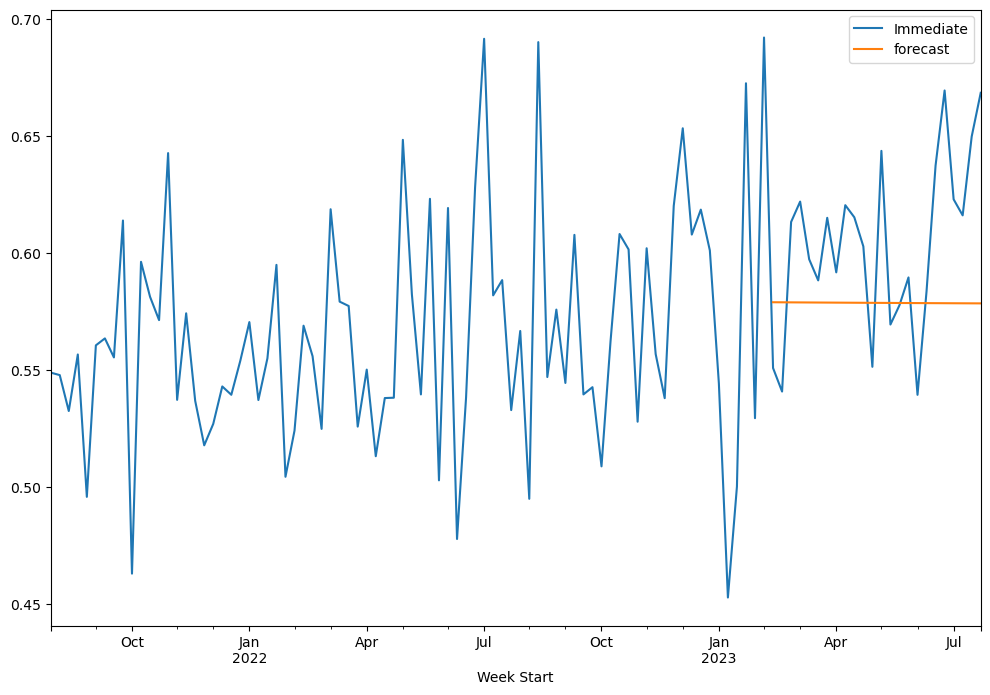

In [20]:
df['forecast']=results.predict(start=80, end = 104, dynamic=True) # testing the model performance with sample input
df[['Immediate','forecast']].plot(figsize=(12,8))

In [21]:
### Predicting future forecast
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+DateOffset(weeks=x)for x in range(0,52)] # Creating future weeks- 26 weeks placeholder

In [26]:
future_dataset_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_dataset_df.index.name = 'Week Start'

In [25]:
future_dataset_df.head()

,Immediate,forecast
Week Start,,
2023-07-30,NaN,NaN
2023-08-06,NaN,NaN
2023-08-13,NaN,NaN
2023-08-20,NaN,NaN
2023-08-27,NaN,NaN


In [27]:
future_df=pd.concat([df,future_dataset_df])

/var/folders/qg/9qnm2g51701gxcxzzwr1q97c0000gn/T/ipykernel_48607/674726799.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_dataset_df])


<Axes: xlabel='Week Start'>

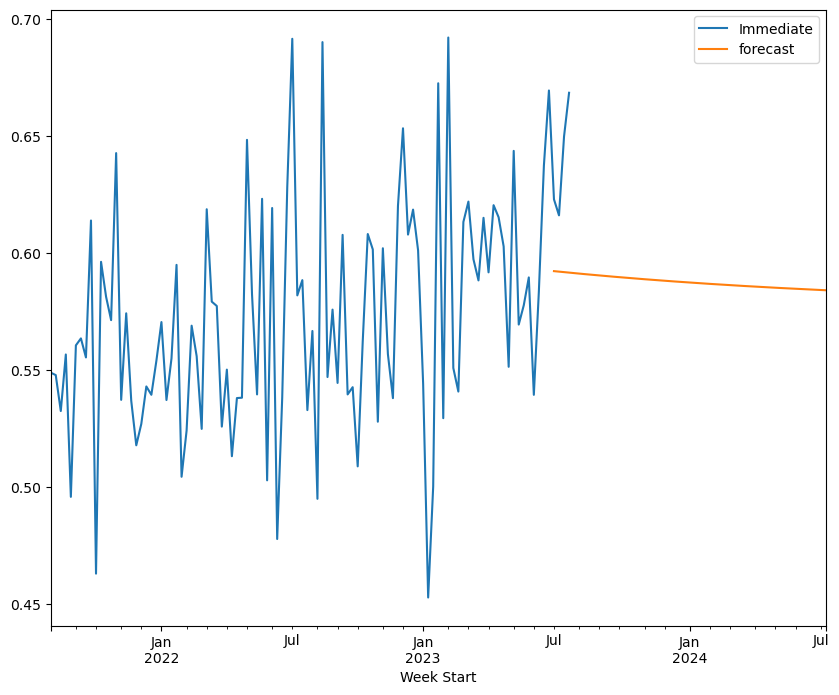

In [28]:
future_df['forecast']=results.predict(start=100, end=158, dynamic=True)
future_df[['Immediate','forecast']].plot(figsize=(10,8))

In [29]:
future_df1=future_df[future_df['forecast'].notna()]
# check the forecast values along with the bookings for the last weeks
print(future_df1)

            Immediate  forecast
Week Start                     
2023-07-02   0.622951  0.592275
2023-07-09   0.616104  0.592059
2023-07-16   0.649778  0.591845
2023-07-23   0.668482  0.591635
2023-07-30        NaN  0.591427
2023-08-06        NaN  0.591223
2023-08-13        NaN  0.591022
2023-08-20        NaN  0.590823
2023-08-27        NaN  0.590627
2023-09-03        NaN  0.590435
2023-09-10        NaN  0.590245
2023-09-17        NaN  0.590057
2023-09-24        NaN  0.589873
2023-10-01        NaN  0.589691
2023-10-08        NaN  0.589512
2023-10-15        NaN  0.589335
2023-10-22        NaN  0.589161
2023-10-29        NaN  0.588989
2023-11-05        NaN  0.588820
2023-11-12        NaN  0.588653
2023-11-19        NaN  0.588489
2023-11-26        NaN  0.588327
2023-12-03        NaN  0.588167
2023-12-10        NaN  0.588010
2023-12-17        NaN  0.587855
2023-12-24        NaN  0.587702
2023-12-31        NaN  0.587552
2024-01-07        NaN  0.587403
2024-01-14        NaN  0.587257
2024-01-

In [35]:
# Save the new dataframe in the workbook
from openpyxl import Workbook  # openpyxl helps to read and write data in excel
future_df1_selected_cols=future_df1[['Immediate','forecast']]

# Remove the time part from the index by formatting it as date only
future_df1_selected_cols.index = future_df1_selected_cols.index.strftime('%Y-%m-%d')

future_df1_selected_cols.to_excel('output3Y.xlsx', index=True, engine='openpyxl')
print('Yes the file is downloading...')

Yes the file is downloading...


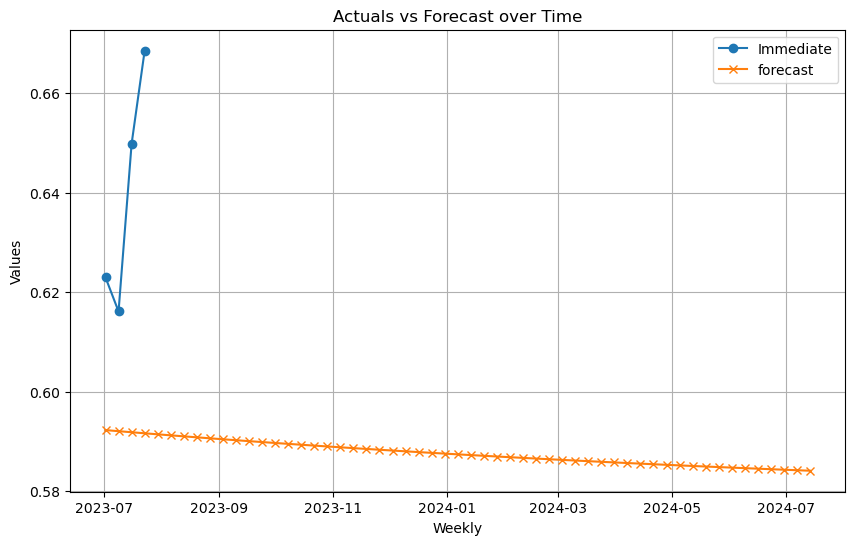

In [36]:
# Plot the Actuals vs Forecast

plt.figure(figsize=(10, 6))
plt.plot(future_df1.index, future_df1['Immediate'], label='Immediate', marker='o')
plt.plot(future_df1.index, future_df1['forecast'], label='forecast', marker='x')

# Customize the graph
plt.title('Actuals vs Forecast over Time')
plt.xlabel('Weekly')
plt.ylabel('Values')
plt.grid(True)
plt.legend(loc='upper right')

# Save the plot to a PNG file. Needs to save first before showing the plot
plt.savefig('actuals_forecast_2022_2024.png')

# Show the plot in Jupyter Notebook
plt.show()

In [37]:
import openpyxl
from openpyxl.drawing.image import Image

# Load the workbook and select the active worksheet
wb = openpyxl.load_workbook('output3Y.xlsx')
ws = wb.active #worksheet activated 

# Add the saved image to the worksheet
img = Image('actuals_forecast_2022_2024.png')
ws.add_image(img, 'G5')  # Insert the image starting from cell G5

# Save the updated Excel file
wb.save('actuals_forecast_2022_2024.xlsx')

In [39]:
### Draw Line chart graph in excel and save it.

import xlsxwriter

# Create an Excel writer object and use xlsxwriter as the engine
with pd.ExcelWriter('output3Y.xlsx', engine='xlsxwriter') as writer:
    
    
    # Write the DataFrame to Excel
    future_df1_selected_cols.to_excel(writer, sheet_name='Sheet2', index=True)

    # Access the workbook and worksheet objects
    workbook = writer.book
    worksheet = writer.sheets['Sheet2']
    
    # Create a chart object (line chart)
    chart = workbook.add_chart({'type': 'line'})

    # Configure the first series (Actuals)
    chart.add_series({
        'name': 'Immediate',
        'categories': ['Sheet2', 1, 0, 55, 0],  # (sheet_name, start_row=1, start_col=0 always, end_row=42, end_col=0 always)
        'values': ['Sheet2', 1, 1, 55, 1],      # (sheet_name, start_row=1, start_col=1, end_row=42, end_col)
    })

    # Configure the second series (Forecast)
    chart.add_series({
        'name': 'forecast',
        'categories': ['Sheet2', 1, 0, 55, 0],  # Date column for categories
        'values': ['Sheet2', 1, 2, 55, 2],      # Forecast values (row 1 to 42, column 2)
    })

    # Add a chart title and axis labels
    chart.set_title({'name': 'Actuals vs Forecast'})
    chart.set_x_axis({'name': 'Weekly'})
    chart.set_y_axis({'name': 'Values'})
    
    # Set a fixed size for the chart (width and height in pixels)
    chart.set_size({'width': 1000, 'height': 600})  # You can adjust these values
    
    # Insert the chart into the worksheet
    worksheet.insert_chart('E2', chart)
    
    print('Yes the file is downloading...')

Yes the file is downloading...
